In [3]:
import pandas as pd
df=pd.read_csv('./중요변수추출.csv')
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1


# map을 이용해 범주형 변수에 숫자 할당

In [4]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
# country
# France     5014
# Germany    2509
# Spain      2477

In [6]:
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

In [7]:
len(df['age_group_gender'].unique())

17

In [8]:
df['age_group_gender'] = df['age_group_gender'].map({'teenager_Male': 0,'teenager_Female': 1,
                                                     'twenties_Male': 2,'twenties_Female': 3,
                                                     'thirties_Male': 4,'thirties_Female': 5,
                                                     'forties_Male': 6,'forties_Female': 7,
                                                     'fifties_Male': 8,'fifties_Female': 9,
                                                     'sixties_Male': 10,'sixties_Female': 11,
                                                     'seventies_Male': 12,'seventies_Female': 13,
                                                     'eighties_Male': 14,'eighties_Female': 15,
                                                     'nineties_Male': 16
                                                     })

In [9]:
df['age_group_gender'].value_counts()

age_group_gender
4     2462
5     1884
6     1371
7     1247
2      855
3      737
8      448
9      421
10     210
11     165
13      70
12      66
0       36
1       13
14       7
15       6
16       2
Name: count, dtype: int64

In [10]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [11]:
csv_filename = '맵을이용해서라벨인코딩.csv'
df.to_csv(csv_filename, index=False)

In [12]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


# 표준화

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

cols_for_standard = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 표준화
scaler = StandardScaler()

# 원핫인코딩이 완료된 데이터프레임 카피하기
df_standardized = df.copy()

# 카피한 데이터프레임에 표준화된 칼럼 붙여넣기
df_standardized[cols_for_standard] = scaler.fit_transform(df[cols_for_standard])

In [14]:
df_standardized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,-0.326221,0,7,-0.402237,0.439067,0.511633,1,1
1,-0.440036,1,7,-1.141788,0.517514,0.726664,1,0
2,-1.536794,0,7,0.464244,-0.450913,-0.705735,0,1
3,0.501521,0,5,-0.201650,1.239547,-0.534073,0,0
4,2.063884,1,7,-0.342349,0.514829,0.083927,1,0
...,...,...,...,...,...,...,...,...
9995,1.246488,0,4,-0.201650,-0.361412,-0.510598,0,0
9996,-1.391939,0,4,-1.511880,-0.952871,0.518374,1,0
9997,0.604988,0,5,0.032368,-0.561532,-0.626813,1,1
9998,1.256835,2,6,-1.376280,-0.409684,-0.543083,0,1


In [15]:
csv_filename = '맵을이용한라벨인코딩데이터프레임표준화.csv'
df_standardized.to_csv(csv_filename, index=False)

In [16]:
x = df_standardized[df_standardized.columns.difference(['churn'])]
y = df_standardized['churn']

In [17]:
x

,active_member,age_group_gender,balance_per_age,balance_per_tenure,country,credit_score,salary_per_products
0,1,7,-0.402237,0.439067,0,-0.326221,0.511633
1,1,7,-1.141788,0.517514,1,-0.440036,0.726664
2,0,7,0.464244,-0.450913,0,-1.536794,-0.705735
3,0,5,-0.201650,1.239547,0,0.501521,-0.534073
4,1,7,-0.342349,0.514829,1,2.063884,0.083927
...,...,...,...,...,...,...,...
9995,0,4,-0.201650,-0.361412,0,1.246488,-0.510598
9996,1,4,-1.511880,-0.952871,0,-1.391939,0.518374
9997,1,5,0.032368,-0.561532,0,0.604988,-0.626813
9998,0,6,-1.376280,-0.409684,2,1.256835,-0.543083


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 학습

train accuracy:1.0000
test accuracy:0.8360
Precision: 0.6585
Recall: 0.3435
F1 Score: 0.4515
Confusion Matrix:
[[1537   70]
 [ 258  135]]
ROC AUC: 0.7897


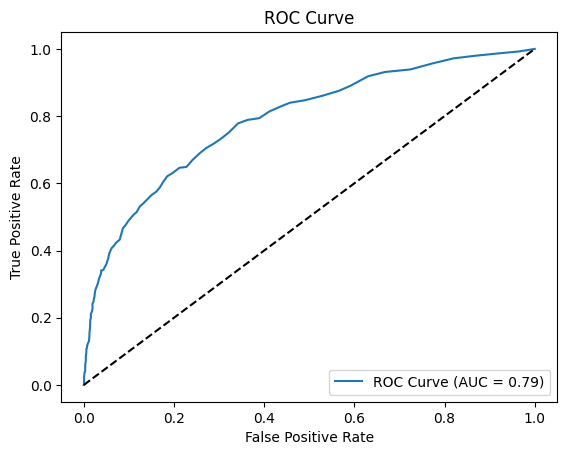

Cross-Validation Scores: [0.8315 0.834  0.828  0.835  0.827 ]
Mean CV Accuracy: 0.8311


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [22]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8360,0.6585,0.3435,0.4515,[[1537 70]\n [ 258 135]],0.7897,[0.8315 0.834 0.828 0.835 0.827 ],0.8311


# 랜덤 포레스트 랜덤 서치

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 437}
Best score:  0.8325000000000001


train accuracy:0.8759
test accuracy:0.8330
Precision: 0.6648
Recall: 0.3028
F1 Score: 0.4161
Confusion Matrix:
[[1547   60]
 [ 274  119]]
ROC AUC: 0.7995


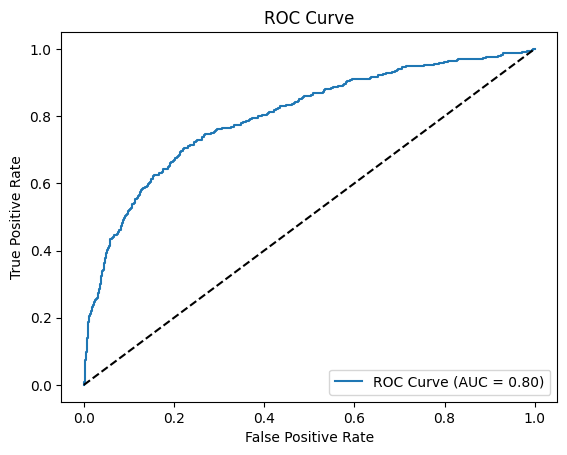

Cross-Validation Scores: [0.8345 0.838  0.831  0.84   0.8285]
Mean CV Accuracy: 0.8344


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=True,
                            max_depth=68,
                            max_features='sqrt',
                            min_samples_leaf=6,
                            min_samples_split=5,
                            n_estimators=115
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

# xgboost 랜덤 서치

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.7860020996045916, 'learning_rate': 0.24056620429189268, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 55, 'subsample': 0.6850793501277221}
Best score:  0.8338750000000001


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


train accuracy:0.8417
test accuracy:0.8415
Precision: 0.6845
Recall: 0.3588
F1 Score: 0.4708
Confusion Matrix:
[[1542   65]
 [ 252  141]]
ROC AUC: 0.8038


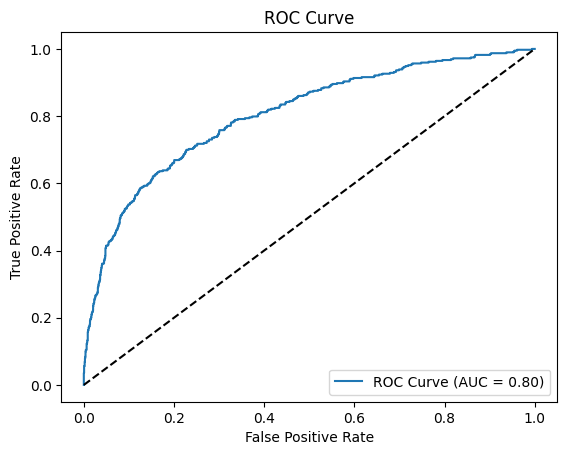

Cross-Validation Scores: [0.835  0.839  0.831  0.842  0.8295]
Mean CV Accuracy: 0.8353


In [26]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=42,
                  colsample_bytree=0.7860020996045916,
                  learning_rate=0.24056620429189268,
                  max_depth=3,
                  min_child_weight=5,
                  n_estimators=55,
                  subsample=0.6850793501277221
                  )

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [27]:
# 정규화, smote로 종속 변수 데이터 균형 맞추기

# 정규화

In [28]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 종속 변수만 제외하고 정규화
cols_for_minmax = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 정규화
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols_for_minmax] = scaler.fit_transform(df[cols_for_minmax])

In [30]:
df_normalized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,0.538,0,7,0.272722,0.196267,0.506790,1,1
1,0.516,1,7,0.192734,0.206282,0.562770,1,0
2,0.304,0,7,0.366438,0.082654,0.189867,0,1
3,0.698,0,5,0.294417,0.298455,0.234557,0,0
4,1.000,1,7,0.279199,0.205939,0.395443,1,0
...,...,...,...,...,...,...,...,...
9995,0.842,0,4,0.294417,0.094080,0.240668,0,0
9996,0.332,0,4,0.152706,0.018575,0.508545,1,0
9997,0.718,0,5,0.319728,0.068533,0.210413,1,1
9998,0.844,2,6,0.167372,0.087917,0.232211,0,1


In [31]:
csv_filename = '순서상관없는라벨인코딩하고정규화.csv'
df_normalized.to_csv(csv_filename, index=False)

# smote

In [32]:
x2 = df_normalized[df_normalized.columns.difference(['churn'])]
y2 = df_normalized['churn']

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x2,y2)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                               test_size=0.2,random_state=42)

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8974056517708242, 'learning_rate': 0.16079112793155764, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 366, 'subsample': 0.7495966899423762}
Best score:  0.8219780219780219


# smote, 정규화 이후 xgboost 랜덤 서치

train accuracy:1.0000
test accuracy:0.8239
Precision: 0.8006
Recall: 0.8506
F1 Score: 0.8249
Confusion Matrix:
[[1304  329]
 [ 232 1321]]
ROC AUC: 0.9112


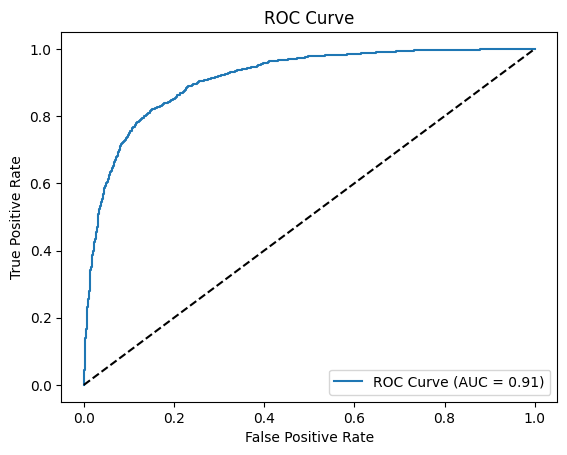

Cross-Validation Scores: [0.8155 0.8185 0.8185 0.8165 0.816 ]
Mean CV Accuracy: 0.8170


In [36]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=42,
                  colsample_bytree=0.8974056517708242,
                  learning_rate=0.16079112793155764,
                  max_depth=14,
                  min_child_weight=1,
                  n_estimators=366,
                  subsample=0.7495966899423762
                  )

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [37]:
df_xgb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8239,0.8006,0.8506,0.8249,[[1304 329]\n [ 232 1321]],0.9112,[0.8155 0.8185 0.8185 0.8165 0.816 ],0.8170


# 랜덤 포레스트

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 96, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 452}
Best score:  0.8446624803767661


train accuracy:1.0000
test accuracy:0.8503
Precision: 0.8388
Recall: 0.8577
F1 Score: 0.8481
Confusion Matrix:
[[1377  256]
 [ 221 1332]]
ROC AUC: 0.9312


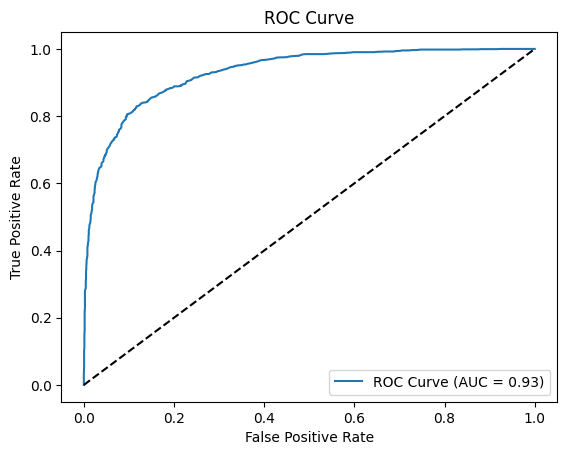

Cross-Validation Scores: [0.817  0.823  0.8165 0.826  0.817 ]
Mean CV Accuracy: 0.8199


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=False,
                            max_depth=50,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=376
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [40]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8503,0.8388,0.8577,0.8481,[[1377 256]\n [ 221 1332]],0.9312,[0.817 0.823 0.8165 0.826 0.817 ],0.8199


# 의사 결정 트리

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # 샘플링할 조합의 수
    cv=5,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'entropy'}


train accuracy:0.9087
test accuracy:0.7649
Precision: 0.7541
Recall: 0.7682
F1 Score: 0.7611
Confusion Matrix:
[[1244  389]
 [ 360 1193]]
ROC AUC: 0.8037


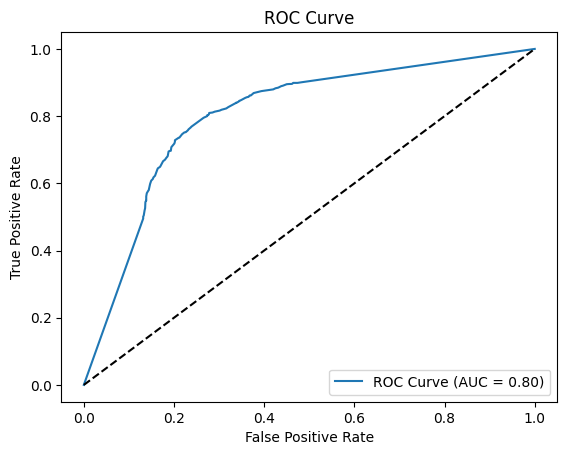

Cross-Validation Scores: [0.7775 0.7755 0.7775 0.7915 0.774 ]
Mean CV Accuracy: 0.7792


In [42]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=16,
    criterion='entropy'
    )

dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = dt.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = dt.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(dt, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data3 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_dt = pd.DataFrame(data3)

In [43]:
df_dt

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.9087,0.7649,0.7541,0.7682,0.7611,[[1244 389]\n [ 360 1193]],0.8037,[0.7775 0.7755 0.7775 0.7915 0.774 ],0.7792


# 로지스틱 회귀

In [44]:
from sklearn.linear_model import LogisticRegression

# 하이퍼파라미터 공간 정의
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 정규화 강도를 조정하는 하이퍼파라미터
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}

# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=50,  # 샘플링할 조합의 수
    cv=5,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 0.0018329807108324356}


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
145 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_co

train accuracy:0.7020
test accuracy:0.7078
Precision: 0.6968
Recall: 0.7090
F1 Score: 0.7028
Confusion Matrix:
[[1154  479]
 [ 452 1101]]
ROC AUC: 0.7609


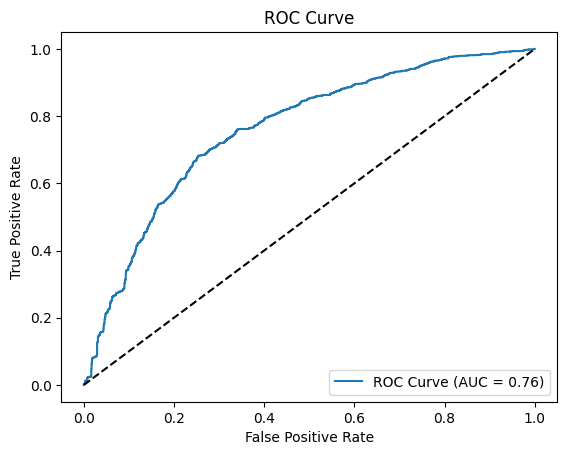

Cross-Validation Scores: [0.795  0.7915 0.7885 0.7965 0.7915]
Mean CV Accuracy: 0.7926


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
lr = LogisticRegression(
    random_state=42,
    solver='newton-cg',
    penalty='l2',
    max_iter=200,
    C=0.0018329807108324356
    )

lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lr.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lr.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lr, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data4 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lr = pd.DataFrame(data4)

In [46]:
df_lr

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.7020,0.7078,0.6968,0.7090,0.7028,[[1154 479]\n [ 452 1101]],0.7609,[0.795 0.7915 0.7885 0.7965 0.7915],0.7926


# support vector machine

In [48]:
from sklearn.svm import SVC
import numpy as np

# 하이퍼파라미터 공간 정의
param_dist = {
    'C': np.logspace(-2, 2, 5),  # 정규화 강도 범위 축소
    'gamma': np.logspace(-2, 2, 5),  # 커널 계수 범위 축소
    'kernel': ['linear', 'rbf'],  # 커널 함수 종류 제한
    'degree': [2, 3]  # 다항식 커널의 차수
}

# SVM 모델 생성
svm = SVC()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=20,  # 샘플링할 조합의 수 축소
    cv=3,  # 교차 검증 폴드 수 축소
    verbose=1,  # 진행 상황 출력
    random_state=42,
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'kernel': 'rbf', 'gamma': 10.0, 'degree': 3, 'C': 10.0}


train accuracy:0.8688
test accuracy:0.8004
Precision: 0.7589
Recall: 0.8654
F1 Score: 0.8087
Confusion Matrix:
[[1206  427]
 [ 209 1344]]
ROC AUC: 0.7609


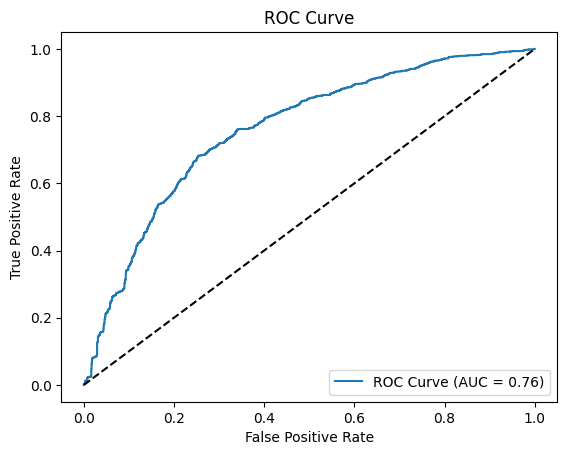

Cross-Validation Scores: [0.779  0.7785 0.7815 0.774  0.7855]
Mean CV Accuracy: 0.7797


In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVM 모델 초기화
svc = SVC(
    random_state=42,
    kernel='rbf',
    gamma=10.0,
    degree=3,
    C=10.0
    )

svc.fit(x_train,y_train)

y_train_pred = svc.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = svc.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

# y_pred_proba = svc.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(svc, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data5 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_svc = pd.DataFrame(data5)

In [50]:
df_svc

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8688,0.8004,0.7589,0.8654,0.8087,[[1206 427]\n [ 209 1344]],0.7609,[0.779 0.7785 0.7815 0.774 0.7855],0.7797


# artificial neural network

In [51]:
from sklearn.neural_network import MLPClassifier

# 하이퍼파라미터 공간 정의
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],  # 은닉층 크기
    'activation': ['tanh', 'relu'],  # 활성화 함수
    'solver': ['sgd', 'adam'],  # 최적화 알고리즘
    'alpha': np.logspace(-4, -1, 4),  # L2 규제 파라미터
    'learning_rate': ['constant', 'adaptive'],  # 학습률
}

# MLPClassifier 모델 생성
mlp = MLPClassifier(max_iter=200)

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    mlp, 
    param_distributions=param_dist, 
    n_iter=20,  # 샘플링할 조합의 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42, 
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train accuracy:0.8236
test accuracy:0.7709
Precision: 0.7342
Recall: 0.8307
F1 Score: 0.7795
Confusion Matrix:
[[1166  467]
 [ 263 1290]]
ROC AUC: 0.8544


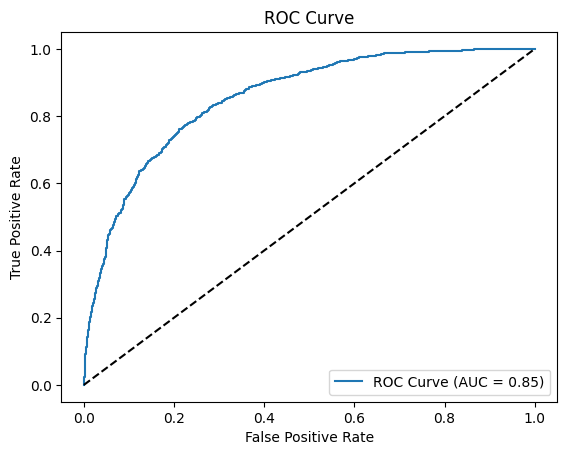

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8165 0.814  0.811  0.8165 0.8135]
Mean CV Accuracy: 0.8143


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 인공 신경망 모델 초기화
# hidden_layer_sizes는 각 은닉층의 뉴런 수를 설정
mlp = MLPClassifier(
    random_state=42,
    solver='adam',
    learning_rate='adaptive',
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.001,
    activation='tanh'
    )

mlp.fit(x_train,y_train)

y_train_pred = mlp.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = mlp.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = mlp.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(mlp, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data6 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_mlp = pd.DataFrame(data6)